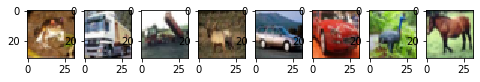

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
%matplotlib inline

(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

def showline(array):
    fig = plt.figure(figsize=(8, 8))
    for i in range(1, 9):
        img = array[i - 1]
        fig.add_subplot(1, 8, i)
        plt.imshow(img)
    plt.show()


showline(X_train)

In [39]:
X_train = X_train / 255.0
X_test = X_test / 255.0

cnn = models.Sequential([
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=5)

cnn.evaluate(X_test,y_test)

Epoch 1/5
1563/1563 [==============================] - 23s 15ms/step - loss: 1.7255 - accuracy: 0.3660

array([[7.1024830e-03, 9.9350326e-04, 4.7451779e-02, 4.7107390e-01,
        4.5289034e-03, 3.4914744e-01, 9.2016533e-02, 2.9031113e-03,
        2.4341274e-02, 4.4111151e-04],
       [2.3331544e-01, 3.9397675e-01, 3.4055140e-04, 2.6424904e-04,
        1.4830721e-04, 6.3116158e-06, 2.1188998e-06, 7.2256516e-05,
        3.3157441e-01, 4.0299591e-02],
       [4.4327725e-02, 1.0407984e-01, 4.0459875e-03, 5.0654877e-03,
        1.4146706e-03, 6.9964654e-04, 8.8786334e-04, 1.8097658e-03,
        8.3071697e-01, 6.9520022e-03],
       [7.5570327e-01, 3.1187516e-02, 7.5167455e-03, 7.0274994e-04,
        2.0709152e-03, 6.2238607e-05, 7.9666829e-04, 9.1339600e-05,
        2.0125408e-01, 6.1450159e-04],
       [3.0897132e-05, 4.4646840e-05, 5.0655934e-03, 5.5720385e-02,
        3.2531509e-01, 3.7108082e-02, 5.7641816e-01, 1.0930610e-04,
        1.8464915e-04, 3.2031089e-06]], dtype=float32)

In [63]:
y_pred = cnn.predict(X_test)
y_classes = np.asarray([np.argmax(element) for element in y_pred])
print(y_classes[:20])

y_test = y_test.reshape(-1,)
print(y_test[:20])

[3 0 8 0 5 6 0 0 3 1 0 9 5 7 8 8 5 5 8 6]
[3 8 8 0 6 6 1 6 3 1 0 9 5 7 9 8 5 7 8 6]
